# ***Cálculo de expansão de área urbana ao longo dos anos.***

* 1 Acesse a coleção do Mapbiomas
* 2 Filtrar a base de dados
* 3 Cálculo de área
* 4 Gere um gráfico

https://tutorials.geemap.org/ImageCollection/mapping_over_image_collection/


In [1]:
%pip install geobr

  Using cached geobr-0.2.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached geopandas-0.14.4-py3-none-any.whl.metadata (1.5 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 13.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---

In [1]:
import geobr

In [ ]:
## Instalando as bibliotecas
%pip install geemap earthengine-api geopandas descartes pyproj rtree -q

In [2]:
%pip install seaborn

In [3]:
##Importar bibliotecas
import pandas as pd
import numpy as np
import geemap
import ee
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
##Autenticação
ee.Authenticate()
ee.Initialize(project='ee-xxxxxxxxxxxxx')

# **MAPBIOMAS**

In [4]:
##Defindo a coleção de imagem  - acessar o asset de dados no Google Earth Engine: ID: projects/mapbiomas-workspace/public/collection7/mapbiomas_collection70_integration_v2
path_project = 'projects/mapbiomas-public/assets/brazil/lulc/collection9/mapbiomas_collection90_integration_v1'

##Define a imagem collection
mapbiomas = ee.Image(path_project)
print('Dados MapBiomas',mapbiomas.bandNames().getInfo())

Dados MapBiomas ['classification_1985', 'classification_1986', 'classification_1987', 'classification_1988', 'classification_1989', 'classification_1990', 'classification_1991', 'classification_1992', 'classification_1993', 'classification_1994', 'classification_1995', 'classification_1996', 'classification_1997', 'classification_1998', 'classification_1999', 'classification_2000', 'classification_2001', 'classification_2002', 'classification_2003', 'classification_2004', 'classification_2005', 'classification_2006', 'classification_2007', 'classification_2008', 'classification_2009', 'classification_2010', 'classification_2011', 'classification_2012', 'classification_2013', 'classification_2014', 'classification_2015', 'classification_2016', 'classification_2017', 'classification_2018', 'classification_2019', 'classification_2020', 'classification_2021', 'classification_2022', 'classification_2023']


In [5]:
##Palette MapBiomas - https://mapbiomas-br-site.s3.amazonaws.com/downloads/_EN__C%C3%B3digos_da_legenda_Cole%C3%A7%C3%A3o_7.pdf
palette_list = [
    "#1f8d49",  # Floresta
    "#1f8d49",  # Formação Florestal
    "#7dc975",  # Formação Savânica
    "#04381d",  # Mangue
    "#007785",  # Floresta Alagável
    "#02d659",  # Restinga Arbórea
    "#d6bc74",  # Vegetação Herbácea e Arbustiva
    "#519799",  # Campo Alagado e Área Pantanosa
    "#d6bc74",  # Formação Campestre
    "#fc8114",  # Apicum
    "#ffaa5f",  # Afloramento Rochoso
    "#ad5100",  # Restinga Herbácea
    "#ffefc3",  # Agropecuária
    "#edde8e",  # Pastagem
    "#E974ED",  # Agricultura
    "#C27BA0",  # Lavoura Temporária
    "#f5b3c8",  # Soja
    "#db7093",  # Cana
    "#c71585",  # Arroz
    "#ff69b4",  # Algodão (beta)
    "#f54ca9",  # Outras Lavouras Temporárias
    "#d082de",  # Lavoura Perene
    "#d68fe2",  # Café
    "#9932cc",  # Citrus
    "#9065d0",  # Dendê
    "#e6ccff",  # Outras Lavouras Perenes
    "#7a5900",  # Silvicultura
    "#ffefc3",  # Mosaico de Usos
    "#d4271e",  # Área não Vegetada
    "#ffa07a",  # Praia, Duna e Areal
    "#d4271e",  # Área Urbanizada
    "#9c0027",  # Mineração
    "#db4d4f",  # Outras Áreas não Vegetadas
    "#2532e4",  # Corpo D'água
    "#2532e4",  # Rio, Lago e Oceano
    "#091077",  # Aquicultura
    "#ffffff",  # Não observado
]

In [6]:
##Visualizando dados do MapBiomas
Map = geemap.Map()

# Mapbiomas layer
map_1985 = mapbiomas.select('classification_1985')
map_2023 = mapbiomas.select('classification_2023')

# show
Map.addLayer(map_1985, {'palette':palette_list, 'min':0, 'max':62},'1985')
Map.addLayer(map_2023, {'palette':palette_list, 'min':0, 'max':62},'2023')


Map.centerObject(map_1985,4)
Map

Map(center=[-13.078778223174195, -53.98051321051916], controls=(WidgetControl(options=['position', 'transparen…

# **Definindo uma região de interesse**

<Axes: >

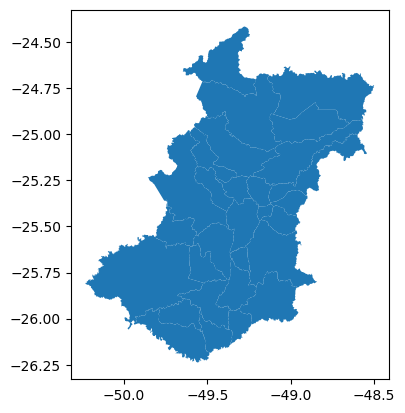

In [7]:
###Selecionando área com o GeoBr

gdf_metro = geobr.read_metro_area(year=2018)
gdf_selected_metro = gdf_metro[gdf_metro['name_metro'] == 'RM Curitiba']

gdf_selected_metro.plot()

projeção ou nao

<Axes: >

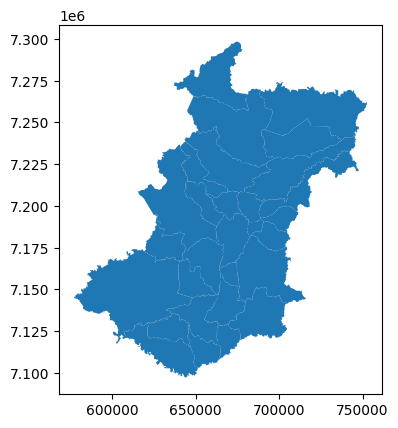

In [ ]:
#gdf_projected = gdf_selected_metro.to_crs('epsg:31982')  # Project to a projected CRS
#gdf_projected.plot()

In [8]:
##Converter shp to json
shp_json = gdf_selected_metro.to_json()
region = json.loads(shp_json)
region = region['features']
region

[{'id': '630',
  'type': 'Feature',
  'properties': {'code_muni': 4100202.0,
   'name_muni': 'Adrianópolis',
   'code_state': 41.0,
   'abbrev_state': 'PR',
   'name_metro': 'RM Curitiba',
   'type': 'RM',
   'subdivision': 'NÃO TEM',
   'legislation': 'Lei 11096',
   'legislation_date': '16.05.1995'},
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[-49.128859748999936, -24.713951913999978],
      [-49.13599967699999, -24.71027501699995],
      [-49.13631522099994, -24.706539381999963],
      [-49.13827006899999, -24.706009931999983],
      [-49.13702939299999, -24.70424777499993],
      [-49.13874839699998, -24.701366272999955],
      [-49.13915704499992, -24.694749708999964],
      [-49.13254541199995, -24.686232880999963],
      [-49.13157889799998, -24.683021415999978],
      [-49.12981900199996, -24.681926736999976],
      [-49.12617319799995, -24.68417632699993],
      [-49.122374211999954, -24.68245070399996],
      [-49.11834718199997, -24.68623877399995],
      [-

In [ ]:
##Definindo região
##Região
##region = ee.FeatureCollection('projects/ee-berbert/assets/SIDRA_MUN_SDG')

In [9]:
roi = ee.FeatureCollection(region)

In [10]:
##Recortando nossa base para a região de interesse
reg_1985 = map_1985.clip(roi)
reg_2023 = map_2023.clip(roi)

In [11]:
##Visualizando dados do MapBiomas
Map= geemap.Map()

Map.addLayer(reg_1985,{'palette':palette_list, 'min':0,'max':62},'Primavera 1985')
Map.addLayer(reg_2023,{'palette':palette_list, 'min':0,'max':62},'Primavera 2023')

# show

Map.centerObject(roi,10)
Map


Map(center=[-25.377730668171143, -49.33562151955085], controls=(WidgetControl(options=['position', 'transparen…

#**Cálculo de área e evolução de classes**

In [12]:
##Cálculo de área  fonte: https://mapbiomas-br-site.s3.amazonaws.com/downloads/_EN__C%C3%B3digos_da_legenda_Cole%C3%A7%C3%A3o_7.pdf
Urban_Area= 24
Forest = 1

##Loop para criar uma image collection a partir das bandas o Mapbiomas
lista = ee.List.sequence(0, 38)
years = ee.List.sequence(1985, 2023)

##Função
def collection_image(number):
  matchKey = ee.String(ee.List(mapbiomas.bandNames()).get(number))##vamos selecionar
                                                                    ##o valor da lista das bandas

  # urban = ee.Image(mapbiomas).select(matchKey).eq(Urban_Area).selfMask().rename('urban');##selcionando apenas a classe de interesse
  # forest = ee.Image(mapbiomas).select(matchKey).eq(Forest).selfMask().rename('forest');##selcionando apenas a classe de interesse

  image = ee.Image(mapbiomas).select(matchKey)
  return image.set('year', years.get(number))\
               .set('system:time_start', ee.Date.fromYMD(years.get(number), 1, 1))\
                .clip(roi)

##Aplicando a função sobre a lista
listImages = lista.map(collection_image)

##Criando nossa coleção de imagens
imageCollection = ee.ImageCollection.fromImages(listImages)
print('Coleção de imagens',imageCollection.size().getInfo())

Coleção de imagens 39


In [19]:
##Verificando as bandas
imageCollection.first().bandNames()

In [15]:
##Quantas imagens
count = imageCollection.size().getInfo()
year_list = years.getInfo()
lista_list= lista.getInfo()

print("Count:", count)
print("Year List:", year_list)
print("Lista List:", lista_list)

Count: 39
Year List: [1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Lista List: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


# **Cálculo de área por ano**

In [16]:
dicionario_classes = {
    1: "Floresta",
    3: "Formação Florestal",
    4: "Formação Savânica",
    5: "Mangue",
    6: "Floresta Alagável",
    49: "Restinga Arbórea",
    10: "Vegetação Herbácea e Arbustiva",
    11: "Campo Alagado e Área Pantanosa",
    12: "Formação Campestre",
    32: "Apicum",
    29: "Afloramento Rochoso",
    50: "Restinga Herbácea",
    14: "Agropecuária",
    15: "Pastagem",
    18: "Agricultura",
    19: "Lavoura Temporária",
    39: "Soja",
    20: "Cana",
    40: "Arroz",
    62: "Algodão (beta)",
    41: "Outras Lavouras Temporárias",
    36: "Lavoura Perene",
    46: "Café",
    47: "Citrus",
    35: "Dendê",
    48: "Outras Lavouras Perenes",
    9: "Silvicultura",
    21: "Mosaico de Usos",
    22: "Área não Vegetada",
    23: "Praia, Duna e Areal",
    24: "Área Urbanizada",
    30: "Mineração",
    25: "Outras Áreas não Vegetadas",
    26: "Corpo D'água",
    33: "Rio, Lago e Oceano",
    31: "Aquicultura",
    27: "Não observado"
}

dicionario_cores = {
    1: "#1f8d49",
    3: "#1f8d49",
    4: "#7dc975",
    5: "#04381d",
    6: "#007785",
    49: "#02d659",
    10: "#d6bc74",
    11: "#519799",
    12: "#d6bc74",
    32: "#fc8114",
    29: "#ffaa5f",
    50: "#ad5100",
    14: "#ffefc3",
    15: "#edde8e",
    18: "#E974ED",
    19: "#C27BA0",
    39: "#f5b3c8",
    20: "#db7093",
    40: "#c71585",
    62: "#ff69b4",
    41: "#f54ca9",
    36: "#d082de",
    46: "#d68fe2",
    47: "#9932cc",
    35: "#9065d0",
    48: "#e6ccff",
    9: "#7a5900",
    21: "#ffefc3",
    22: "#d4271e",
    23: "#ffa07a",
    24: "#d4271e",
    30: "#9c0027",
    25: "#db4d4f",
    26: "#2532e4",
    33: "#2532e4",
    31: "#091077",
    27: "#ffffff"
}

## paleta
paleta_nomes = {key:value for key, value in zip(dicionario_classes.values(), dicionario_cores.values())}

In [17]:
##Abrindo todas as imagens
##Calcular a área para todas as imagens
df = []

##Calcular a área e gera o dataframe
for i in range(0,count,2): ######################ALTEREI PARA 5 ANOS#################################
    image = ee.Image((listImages).get(i))

    ##Calculo de área dos pixels de classificação
    areaImage = ee.Image.pixelArea().divide(1e6).addBands(image);

    ##Agrupando valores
    areas = areaImage.reduceRegion(**{
    ##Agrupa os registros do redutor pelo valor de uma determinada entrada e reduz
    ##cada grupo com o redutor fornecido.
      'reducer': ee.Reducer.sum().group(**{
      'groupField': 1,
      'groupName': 'classification'+'_'+str(year_list[i]),
    }),
    'geometry': roi,
    'scale': 30,
    'bestEffort': True,
    'maxPixels': 1e13
    })

    # Criando uma lista para extrair o valor da área
    lista = areas.get('groups').getInfo()

    # Transformando a lista em Dataframe
    area_df = pd.DataFrame(lista, columns=['classification'+'_'+str(year_list[i]),'sum'])

    ##Adicionando uma coluna com o ano
    area_df['ano'] = int(year_list[i])
    ##Area_km2 =
    area_df['area'] = area_df['sum'].round(2)
    # Adicionando uma coluna com número da classe para renomear de acordo com o dicionário
    area_df['classe'] = area_df['classification_'+str(year_list[i])]
    ##Renomeando considerando o lugar
    area_df['nome_classe']= area_df['classe'].replace(dicionario_classes)
    ##Removendo colunas
    area_df = area_df.drop(columns=['classification_'+str(year_list[i]),'sum'], axis = 1)

    ##Juntado o DataFrame com a lista vazia criada
    df.append(area_df)

In [58]:
## cria um dataframe completo
df_completo = pd.concat(df, axis = 'index')
df_completo.round(2).head()

,ano,area,classe,nome_classe
0,1985,0.74,0,0
1,1985,8749.79,3,Formação Florestal
2,1985,434.67,9,Silvicultura
3,1985,73.37,11,Campo Alagado e Área Pantanosa
4,1985,80.48,12,Formação Campestre


In [59]:
## criando coluna de classe e de área
df_melt = pd.melt(df_completo, id_vars=['ano','classe','nome_classe'],value_vars='area', value_name="Area_km_2",var_name='Área_classe').dropna()
df_melt.head()

,ano,classe,nome_classe,Área_classe,Area_km_2
0,1985,0,0,area,0.74
1,1985,3,Formação Florestal,area,8749.79
2,1985,9,Silvicultura,area,434.67
3,1985,11,Campo Alagado e Área Pantanosa,area,73.37
4,1985,12,Formação Campestre,area,80.48


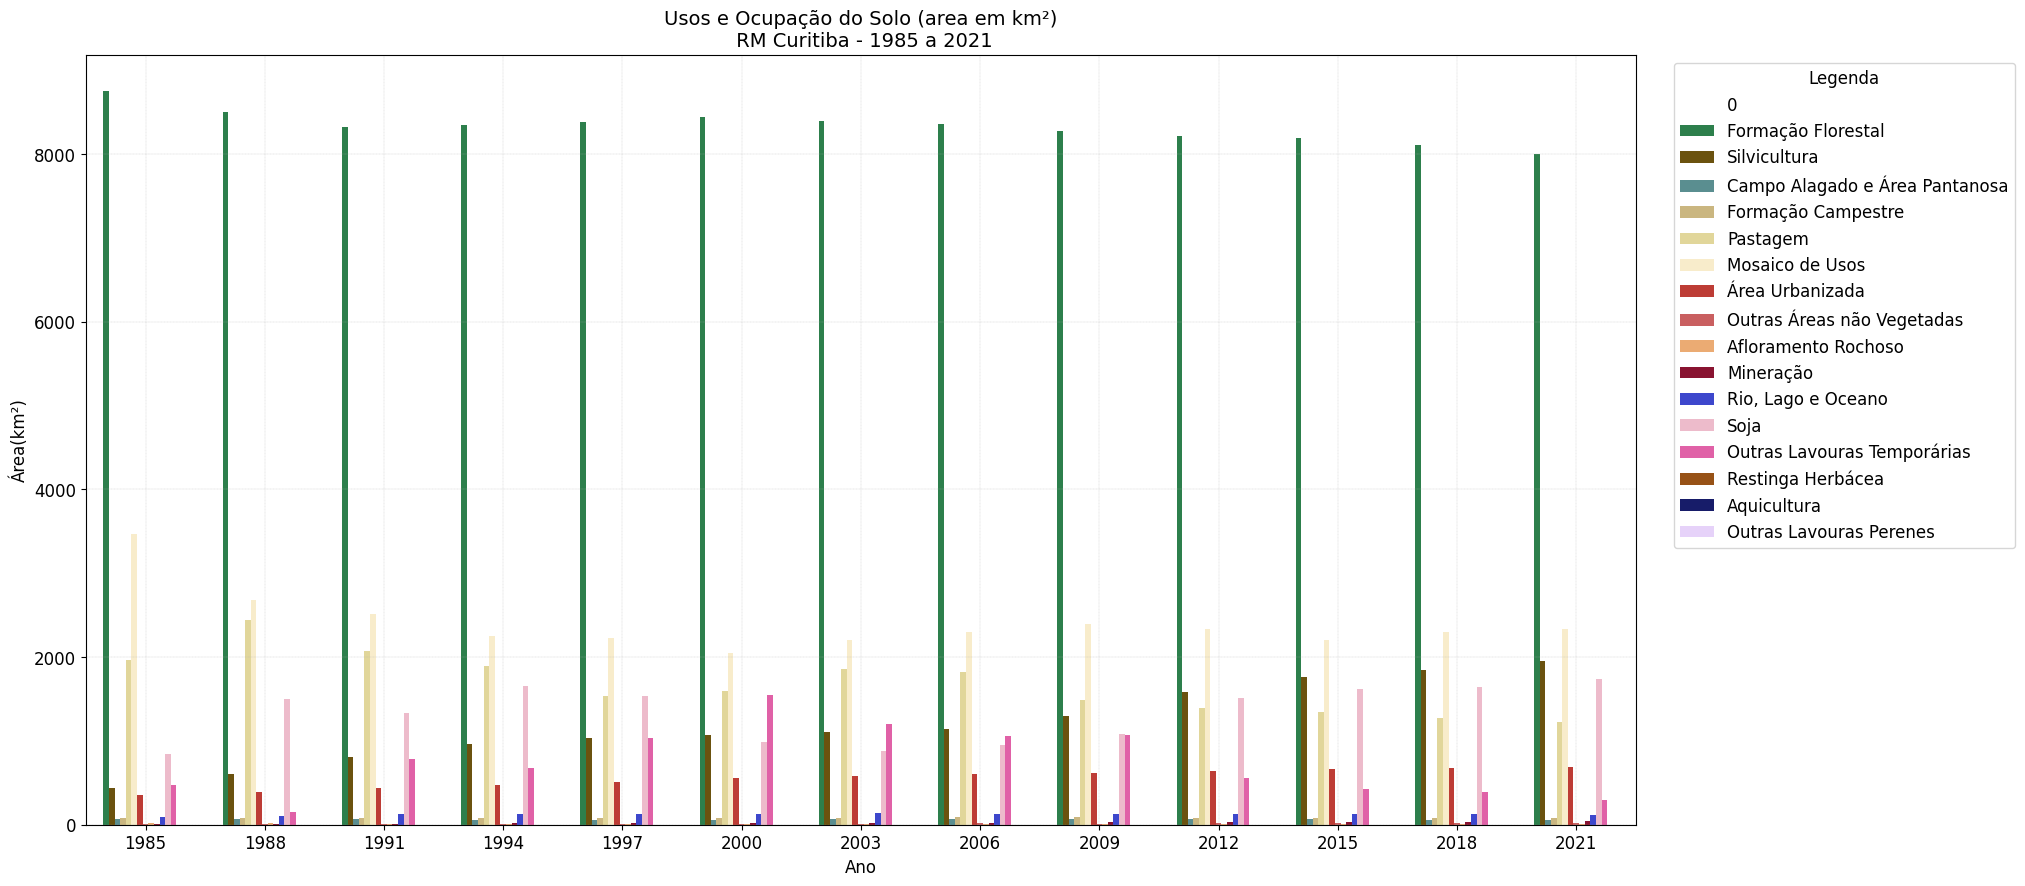

In [60]:
## Plot geral - evolução do uso do solo
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df_melt, x="ano", y="Area_km_2", hue="nome_classe", palette=paleta_nomes)

#Título
plt.title('Usos e Ocupação do Solo (area em km²)\n RM Curitiba - 1985 a 2021', fontsize =14)

##eixo x
plt.xlabel('Ano',fontsize=12)
plt.xticks(fontsize=12)
##eixo y
plt.ylabel('Área(km²)',fontsize=12)
plt.yticks(fontsize=12)

##Personalizando o gráfico
plt.grid(visible=True, linestyle='--', linewidth=0.2, which='both') # Use 'visible' instead of 'grid_b' or 'b'
ax.legend(loc="upper right",bbox_to_anchor=(1.25, 1), title = "Legenda", title_fontsize = "12", fontsize='12')

# **Verificando a expansão da área urbana e demais classes**

In [61]:
##Selecionar apenas a classe área urbana
df_urban=df_melt[df_melt.nome_classe=='Área Urbanizada']
df_urban

,ano,classe,nome_classe,Área_classe,Area_km_2
7,1985,24,Área Urbanizada,area,349.53
22,1988,24,Área Urbanizada,area,393.19
36,1991,24,Área Urbanizada,area,435.58
50,1994,24,Área Urbanizada,area,476.34
64,1997,24,Área Urbanizada,area,512.64
78,2000,24,Área Urbanizada,area,557.25
92,2003,24,Área Urbanizada,area,582.94
107,2006,24,Área Urbanizada,area,605.65
122,2009,24,Área Urbanizada,area,620.85
136,2012,24,Área Urbanizada,area,643.72


In [62]:
##Dataframe para mineração
df_mine=df_melt[df_melt.nome_classe=='Mineração']
df_mine

,ano,classe,nome_classe,Área_classe,Area_km_2
10,1985,30,Mineração,area,6.93
25,1988,30,Mineração,area,10.28
39,1991,30,Mineração,area,12.77
53,1994,30,Mineração,area,15.30
67,1997,30,Mineração,area,17.98
81,2000,30,Mineração,area,21.40
95,2003,30,Mineração,area,23.93
110,2006,30,Mineração,area,25.94
125,2009,30,Mineração,area,28.43
139,2012,30,Mineração,area,31.31


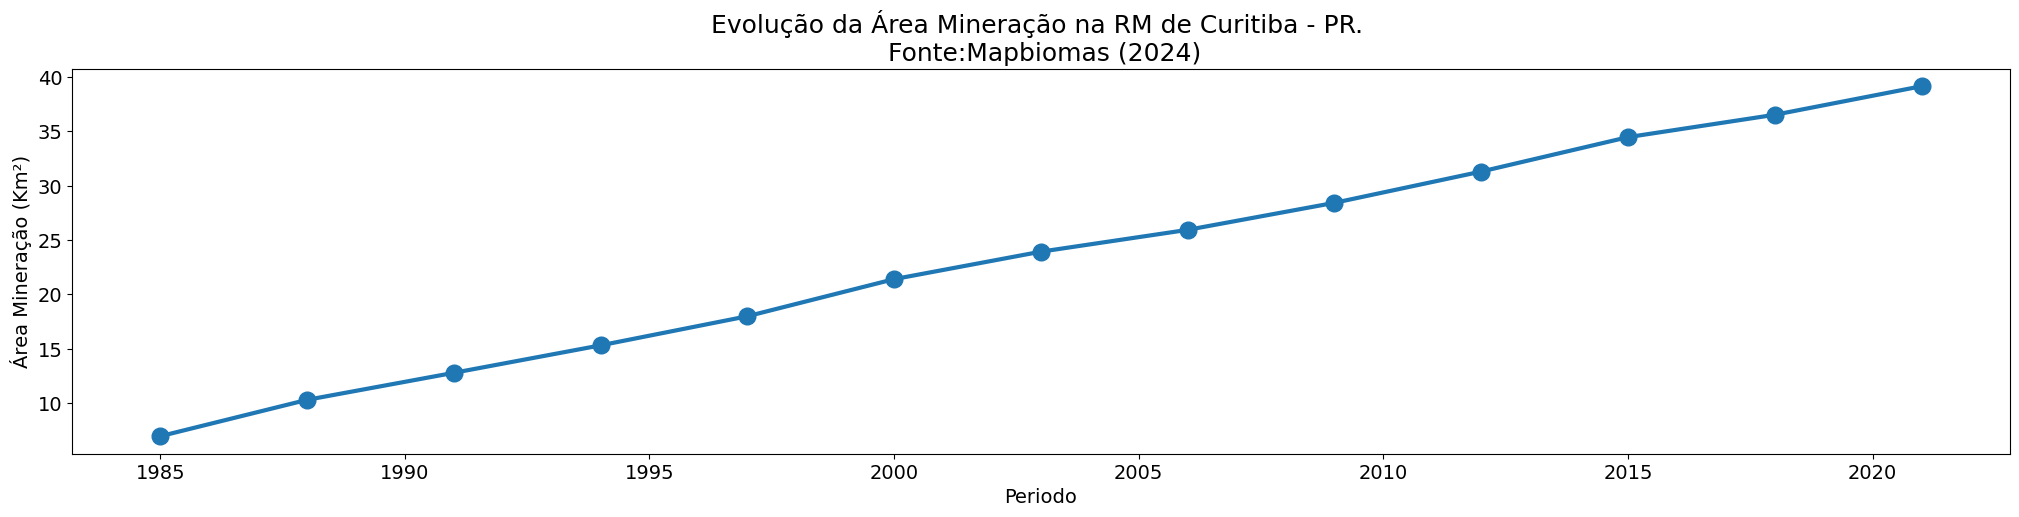

In [63]:
##Definindo o tamando da figura
fig, ax = plt.subplots(figsize=(25,5))

##Definindo o x e o y da figura
x = df_mine['ano']
y = df_mine['Area_km_2']

#Título
plt.title('Evolução da Área Mineração na RM de Curitiba - PR. \n Fonte:Mapbiomas (2024)', fontsize=18)

##Definir marcação
plt.plot(x, y, marker='o', linewidth=3, markersize=12) ##dados de área
##Eixo x
plt.xlabel('Periodo',fontsize=14)
plt.xticks(rotation=0,fontsize=14)

##Eixo Y
plt.ylabel('Área Mineração (Km²)',fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [35]:


# Selecionar apenas a classe Silvicultura
df_silvicultura = df_melt[df_melt.nome_classe == 'Silvicultura']
df_silvicultura



,ano,classe,nome_classe,Área_classe,Area_km_2
2,1985,9,Silvicultura,area,434.67
17,1988,9,Silvicultura,area,607.11
31,1991,9,Silvicultura,area,811.51
45,1994,9,Silvicultura,area,962.46
59,1997,9,Silvicultura,area,1031.45
73,2000,9,Silvicultura,area,1074.57
87,2003,9,Silvicultura,area,1108.63
102,2006,9,Silvicultura,area,1137.53
117,2009,9,Silvicultura,area,1295.09
131,2012,9,Silvicultura,area,1581.06


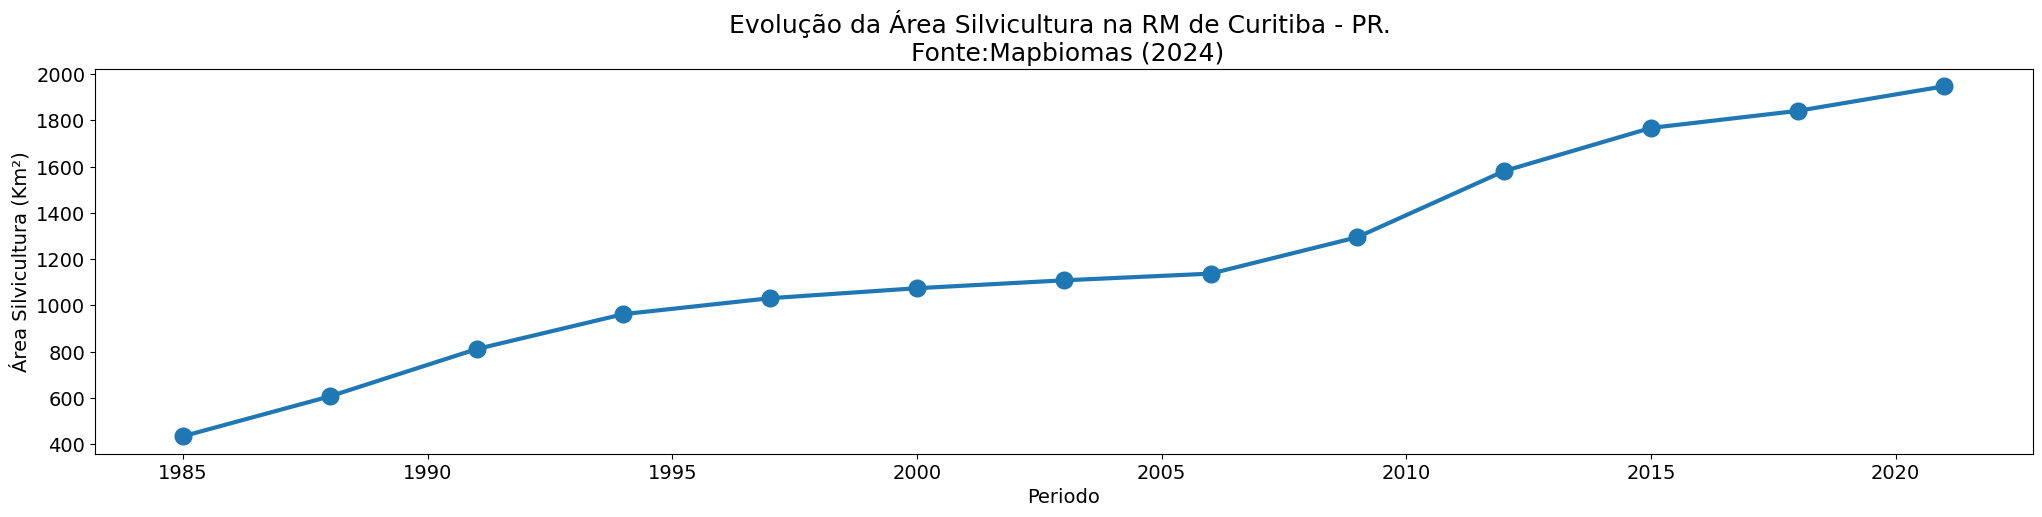

In [64]:
##Definindo o tamando da figura
fig, ax = plt.subplots(figsize=(25,5))

##Definindo o x e o y da figura
x = df_silvicultura['ano']
y = df_silvicultura['Area_km_2']

#Título
plt.title('Evolução da Área Silvicultura na RM de Curitiba - PR. \n Fonte:Mapbiomas (2024)', fontsize=18)

##Definir marcação
plt.plot(x, y, marker='o', linewidth=3, markersize=12) ##dados de área
##Eixo x
plt.xlabel('Periodo',fontsize=14)
plt.xticks(rotation=0,fontsize=14)

##Eixo Y
plt.ylabel('Área Silvicultura (Km²)',fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [ ]:
# Selecionar apenas a classe Soja
df_soja = df_melt[df_melt.nome_classe == 'Soja']
df_soja


,ano,classe,nome_classe,Área_classe,Area_km_2
12,1985,39,Soja,area,845.78
27,1988,39,Soja,area,1495.80
41,1991,39,Soja,area,1334.62
55,1994,39,Soja,area,1660.81
69,1997,39,Soja,area,1534.40
83,2000,39,Soja,area,991.75
97,2003,39,Soja,area,881.46
112,2006,39,Soja,area,957.15
127,2009,39,Soja,area,1082.56
141,2012,39,Soja,area,1510.76


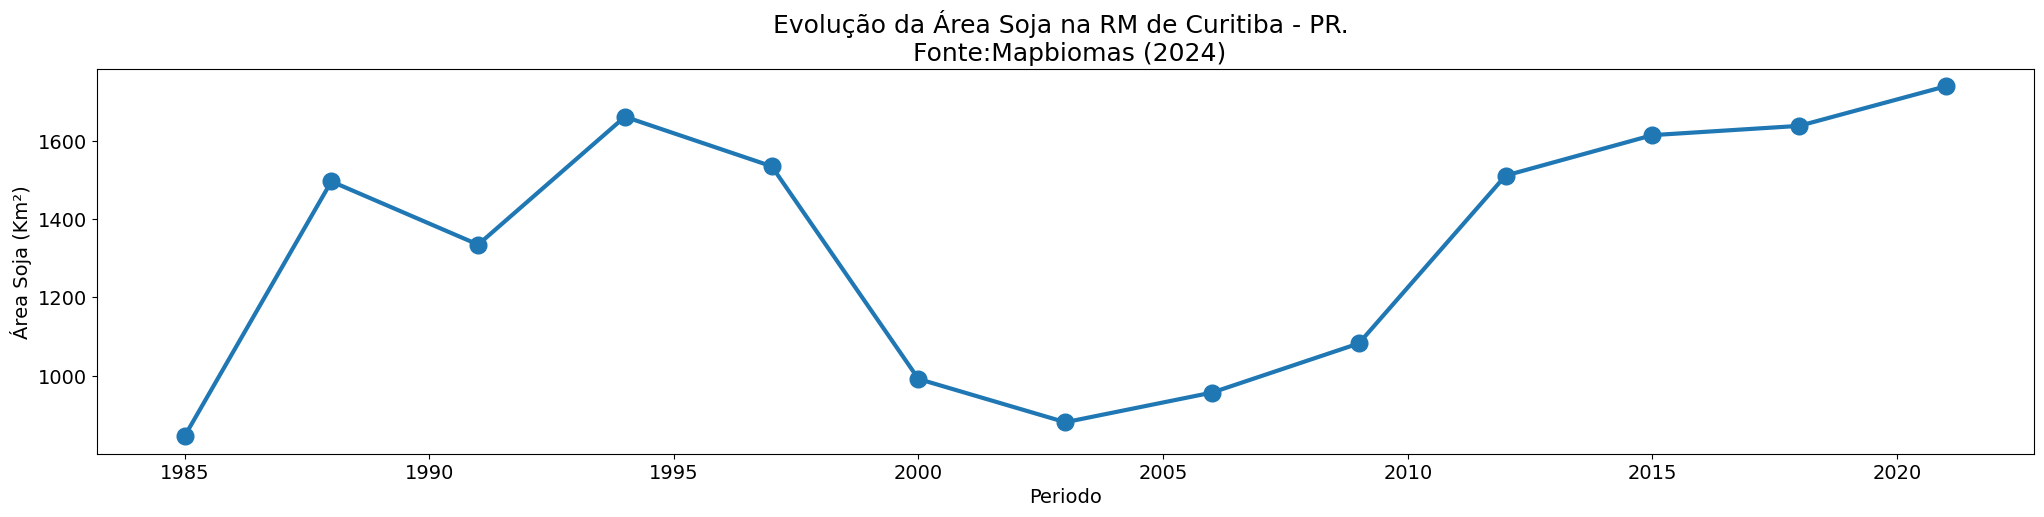

In [65]:
##Definindo o tamando da figura
fig, ax = plt.subplots(figsize=(25,5))

##Definindo o x e o y da figura
x = df_soja['ano']
y = df_soja['Area_km_2']

#Título
plt.title('Evolução da Área Soja na RM de Curitiba - PR. \n Fonte:Mapbiomas (2024)', fontsize=18)

##Definir marcação
plt.plot(x, y, marker='o', linewidth=3, markersize=12) ##dados de área
##Eixo x
plt.xlabel('Periodo',fontsize=14)
plt.xticks(rotation=0,fontsize=14)

##Eixo Y
plt.ylabel('Área Soja (Km²)',fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [31]:
##Selecionar apenas a classe formação florestal 
df_veg=df_melt[df_melt.nome_classe=='Formação Florestal']
df_veg

,ano,classe,nome_classe,Área_classe,Area_km_2
1,1985,3,Formação Florestal,area,8749.79
16,1988,3,Formação Florestal,area,8504.63
30,1991,3,Formação Florestal,area,8320.83
44,1994,3,Formação Florestal,area,8346.92
58,1997,3,Formação Florestal,area,8382.29
72,2000,3,Formação Florestal,area,8441.49
86,2003,3,Formação Florestal,area,8396.93
101,2006,3,Formação Florestal,area,8356.37
116,2009,3,Formação Florestal,area,8279.31
130,2012,3,Formação Florestal,area,8212.20


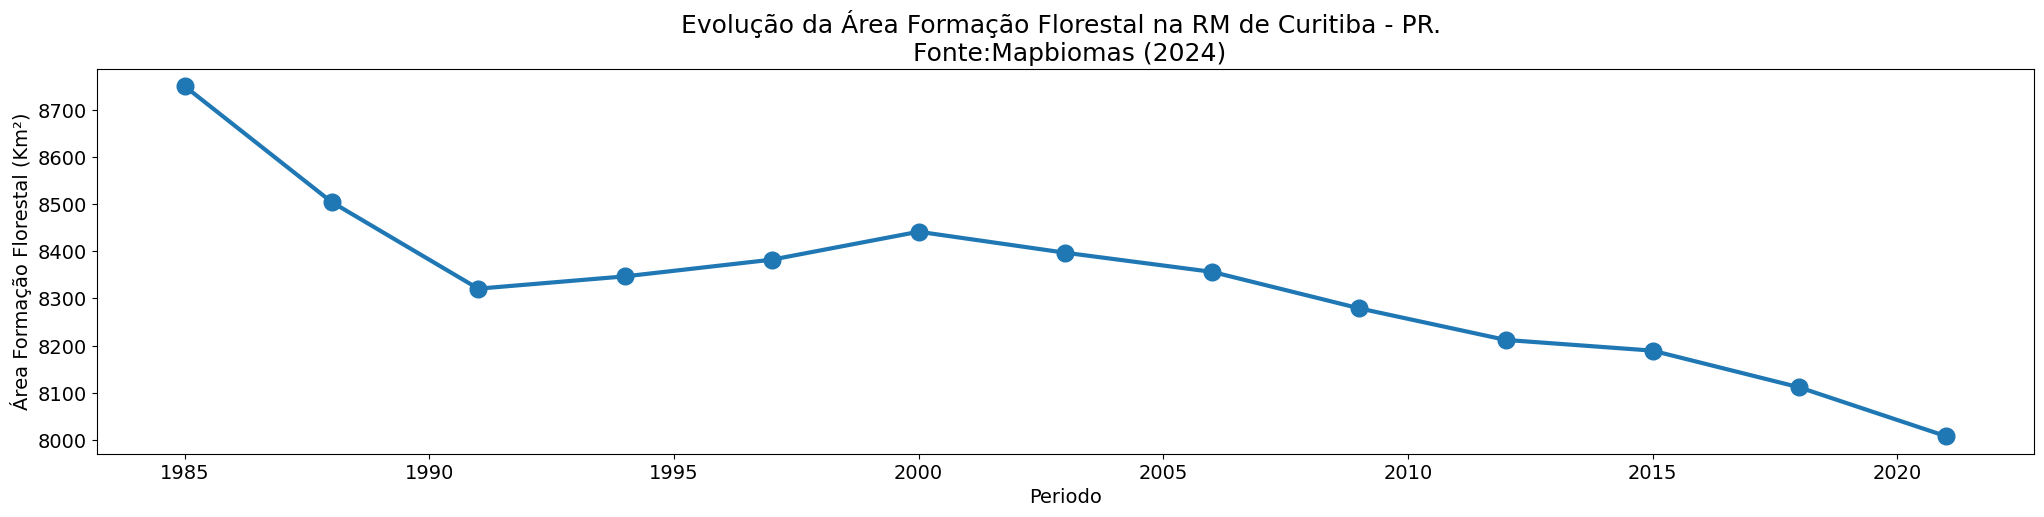

In [66]:
##Definindo o tamando da figura
fig, ax = plt.subplots(figsize=(25,5))

##Definindo o x e o y da figura
x = df_veg['ano']
y = df_veg['Area_km_2']

#Título
plt.title('Evolução da Área Formação Florestal na RM de Curitiba - PR. \n Fonte:Mapbiomas (2024)', fontsize=18)

##Definir marcação
plt.plot(x, y, marker='o', linewidth=3, markersize=12) ##dados de área
##Eixo x
plt.xlabel('Periodo',fontsize=14)
plt.xticks(rotation=0,fontsize=14)

##Eixo Y
plt.ylabel('Área Formação Florestal (Km²)',fontsize=14)
plt.yticks(fontsize=14)

plt.show()

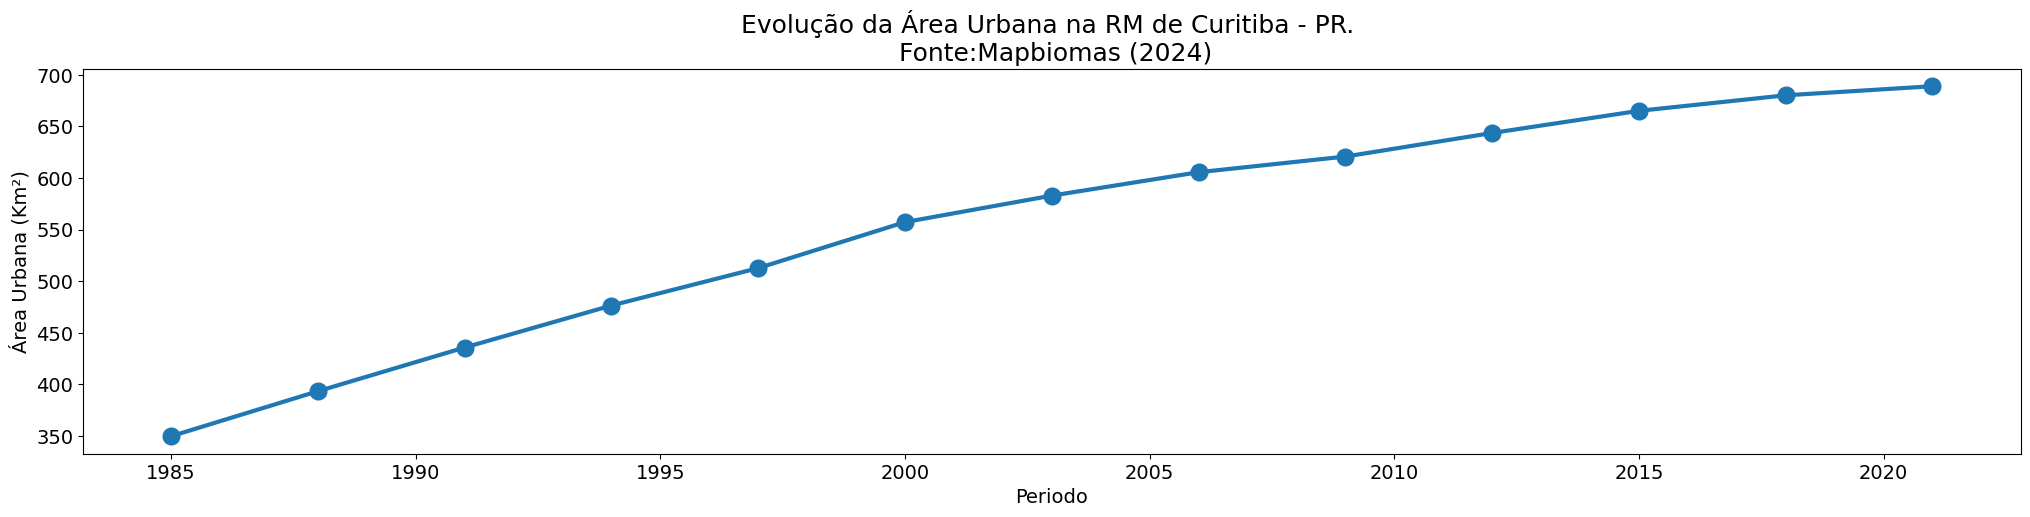

In [75]:
##Definindo o tamando da figura
fig, ax = plt.subplots(figsize=(25,5))

##Definindo o x e o y da figura
x = df_urban['ano']
y = df_urban['Area_km_2']

#Título
plt.title('Evolução da Área Urbana na RM de Curitiba - PR. \n Fonte:Mapbiomas (2024)', fontsize=18)

##Definir marcação
plt.plot(x, y, marker='o', linewidth=3, markersize=12) ##dados de área
##Eixo x
plt.xlabel('Periodo',fontsize=14)
plt.xticks(rotation=0,fontsize=14)

##Eixo Y
plt.ylabel('Área Urbana (Km²)',fontsize=14)
plt.yticks(fontsize=14)

plt.show()

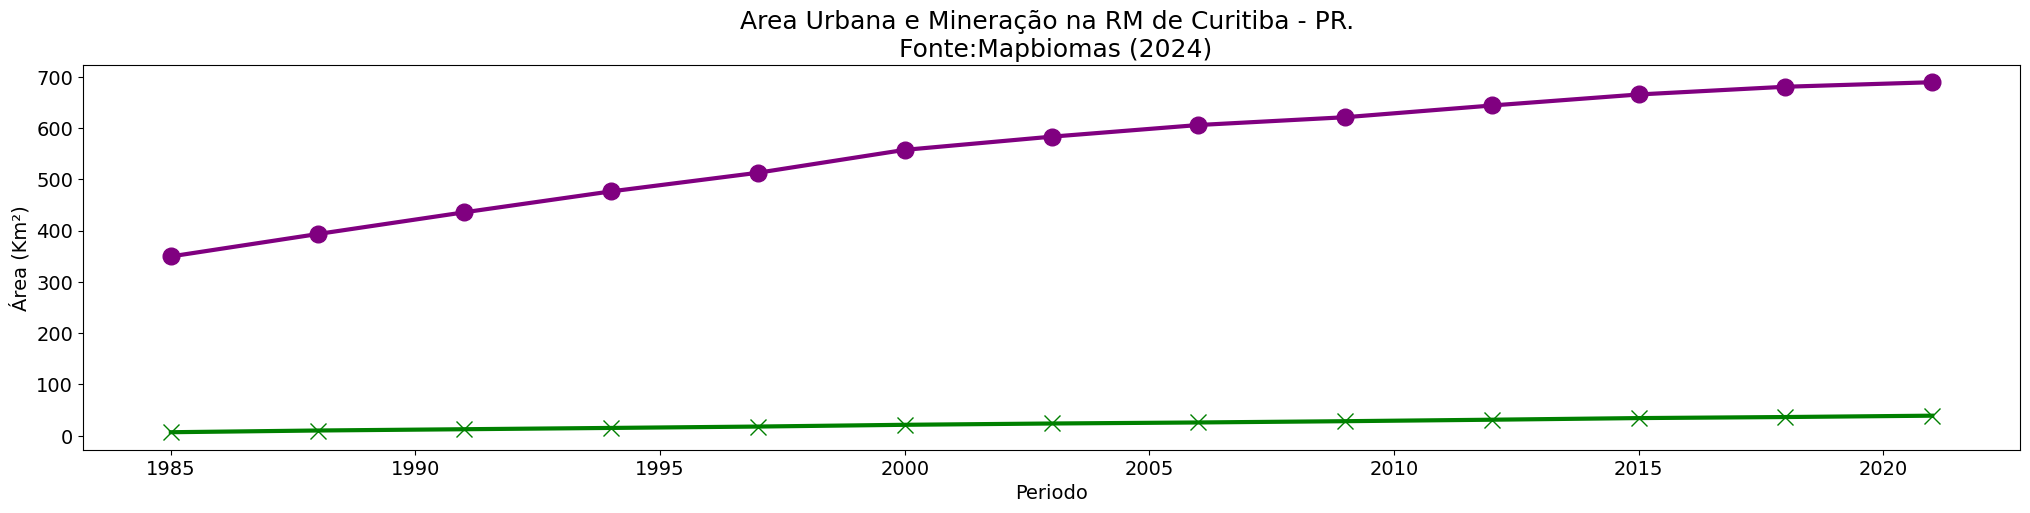

In [67]:
##Definindo o tamando da figura
fig, ax = plt.subplots(figsize=(25,5))

##Definindo o x e o y da figura
x = df_urban['ano']
y = df_urban['Area_km_2']
y2 = df_mine['Area_km_2']

#Título
plt.title('Area Urbana e Mineração na RM de Curitiba - PR. \n Fonte:Mapbiomas (2024)', fontsize=18)

##Definir marcação
plt.plot(x, y, marker='o', linewidth=3, markersize=12, color='purple') ##dados de área
plt.plot(x, y2, marker='x', linewidth=3, markersize=12, color='green') ##dados de área
##Eixo x
plt.xlabel('Periodo',fontsize=14)
plt.xticks(rotation=0,fontsize=14)

##Eixo Y
plt.ylabel('Área (Km²)',fontsize=14)
plt.yticks(fontsize=14)

plt.show()